In [18]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def load_from_sparsed(name, samples = 800, attributes = 100000):
    matrix = -1*np.ones((samples, attributes))
    with open(name, "r") as f:
        for (i, line) in enumerate(f):
            temp = f.readline()
            temp = temp.split(" ")
            index = [int(value)-1 for value in temp[:-1]]
            matrix[i, index] = 1
    return matrix

completeT = load_from_sparsed("dorothea_train.data")
completeC = np.genfromtxt("dorothea_train.labels")

indp = completeC == 1
posT = completeT[indp,:]
posC = completeC[indp]
negT = completeT[np.logical_not(indp),:]
negC = completeC[np.logical_not(indp)]


# rfc = RandomForestClassifier(n_estimators=500, n_jobs = -1)

# rfc.fit(training, classified)


# """
#     Saves forest
# """
# import pickle

# with open('forest.pkl', 'wb') as f:
#     pickle.dump(rf, f)

In [223]:
np.random.shuffle(negT)
new_train = np.concatenate((posT,negT[:90]))
new_class = np.concatenate((posC,negC[:90]))

valid = load_from_sparsed("dorothea_valid.data")
testing = load_from_sparsed("dorothea_test.data")

In [215]:
# rfc = RandomForestClassifier(n_estimators=200, n_jobs = -1)

# rfc.fit(new_train, new_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [216]:
predictions = rfc.predict(completeT)

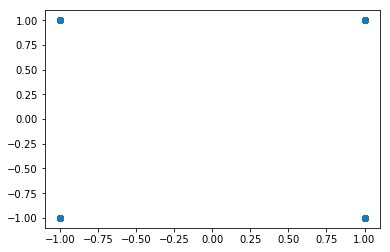

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(completeC, predictions, "o")

In [218]:
print(rfc.score(posT,posC))
print(rfc.score(negT,negC))
print(rfc.score(completeT,completeC))

0.551282051282
0.919667590028
0.88375


In [219]:
# """
#     Saves forest
# """
# import pickle

# with open('forest.pkl', 'wb') as f:
#     pickle.dump(rfc, f)

In [221]:
def count_pos(Y):
    ind = Y > 0
    posi = Y[ind]
    return posi.shape[0]

testp = rfc.predict(testing)
print(count_pos(testp))
validp = rfc.predict(valid)
print(count_pos(validp))

68
25


In [185]:
# rfcp = pickle.load(open('forest.pkl','rb'))

In [186]:
# testi = rfcp.predict(testing)
# print(count_pos(testi))

0


In [222]:
"""
    Saves forest
"""
import pickle

with open('forest.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [ ]:
def goodness(new_train,new_class):
    testa = np.array([])
    valida = np.array([])
    for i in range(100):
        rfc = RandomForestClassifier(n_estimators=200, n_jobs = -1)
        rfc.fit(new_train, new_class)
        testp = rfc.predict(testing)
        validp = rfc.predict(valid)
        testa = np.append(testa,count_pos(testp))
        valida = np.append(valida,count_pos(validp))
        print(i)
    return valida,testa

valida,testa = goodness(new_train,new_class)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
